In [1]:
# import library

import pandas as pd

In [2]:
# load dataset

dataset=pd.read_csv("CSUSHPISA.csv")
dataset

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
435,2023-04-01,300.198
436,2023-05-01,302.620
437,2023-06-01,304.651
438,2023-07-01,306.634


# Standardization/ Normalizaton
# MinMax Scaler

In [3]:
# Time Series - Univariate

column="CSUSHPISA"

In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(dataset[[column]])
print("Len:",data1.shape)

Len: (440, 1)


In [5]:
len(data1)

440

# Split Training and Testing data using series of data

In [6]:
# x_train, x_test  - input training and testing data
# y_train, y_test  - output training and testing data

training_size = round(len(data1 ) * 0.80)  # Total -440
print(training_size)

X_train=data1[:training_size]              # first 0:352
X_test=data1[training_size:]               # 88: last
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)

y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

352
X_train length: (352, 1)
X_test length: (88, 1)
y_train length: (352, 1)
y_test length: (88, 1)


# Model Creation

In [7]:
# ! pip install stockFunctions

ERROR: Could not find a version that satisfies the requirement stockFunctions (from versions: none)
ERROR: No matching distribution found for stockFunctions


In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
from sklearn.metrics import mean_squared_error

trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]

from statsmodels.tsa.arima.model import ARIMA
  
for td in trends:        
        #print(td)
        #trendslist.append(td)
        model = ARIMA(X_train, order=(0,0,10),trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        
        # from UserDefinedFns import rmsemape
        # rmsemape(y_test,y_pred)
        
        from sklearn import metrics
        print("Trend={}".format(td))
        # rmse - root mean squared error
        print("rmse :", metrics.mean_squared_error(y_test,y_pred))
        # mape - mean absolute percentage error
        print("mape :", metrics.mean_absolute_percentage_error(y_test,y_pred))
        
        
        print("************")

Trend=n
rmse : 0.48812663314462673
mape : 0.9443365998609984
************
Trend=t
rmse : 0.05015359455983695
mape : 0.21506652104305735
************
Trend=c
rmse : 0.24194714510850074
mape : 0.6267146492557208
************
Trend=ct
rmse : 0.043354431187190734
mape : 0.18764212570429414
************


In [9]:
len(y_pred)

88

# Trend=ct

In [17]:
# choose minimum rmse and mape values of trend


td='ct'

model =  ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)

# from stockFunctions import rmsemape

from sklearn import metrics
print("Trend={}".format(td))
# rmse - root mean squared error
print("rmse :", metrics.mean_squared_error(y_test,y_pred))
# mape - mean absolute percentage error
print("mape :", metrics.mean_absolute_percentage_error(y_test,y_pred))

# rmsemape(y_test,y_pred)
print("************")

Trend=ct
rmse : 0.04350462014416851
mape : 0.18830861947609187
************


# Graph

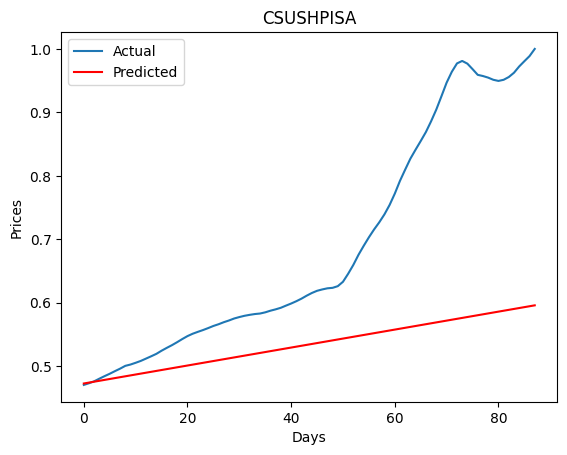

In [18]:
import matplotlib.pyplot as plt

# plt.plot("Actual ",y_test)
# plt.plot("Predicted ", y_pred,colors='red')
plt.title("CSUSHPISA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(y_test, label='Actual')
plt.plot(y_pred,color='red', label='Predicted')
plt.legend()
plt.show()

In [19]:
len(data1)

440

In [20]:
# Actual values

y_test

array([[0.47043868],
       [0.47310737],
       [0.47616312],
       [0.48030264],
       [0.48426697],
       [0.48804387],
       [0.49215487],
       [0.49609068],
       [0.50049096],
       [0.50256072],
       [0.50532719],
       [0.5083096 ],
       [0.5119439 ],
       [0.51559858],
       [0.51941623],
       [0.52435839],
       [0.52882386],
       [0.53308561],
       [0.53778332],
       [0.542754  ],
       [0.54738245],
       [0.55110231],
       [0.55409287],
       [0.55692046],
       [0.56004954],
       [0.56336605],
       [0.56609585],
       [0.56927791],
       [0.57198734],
       [0.57511235],
       [0.5773899 ],
       [0.57938632],
       [0.58089383],
       [0.5821528 ],
       [0.58296359],
       [0.58483371],
       [0.58740868],
       [0.58953141],
       [0.59198823],
       [0.59541067],
       [0.59871496],
       [0.60236148],
       [0.60642359],
       [0.61110907],
       [0.61534231],
       [0.61877697],
       [0.62092821],
       [0.622

In [21]:
# actual values -  y_test
# Convert minmax scaler into inverse_transform 

actual=Ms.inverse_transform(y_test)

In [22]:
# Predcted values

y_pred

array([0.47270325, 0.47411883, 0.47553442, 0.47695001, 0.47836559,
       0.47978118, 0.48119677, 0.48261235, 0.48402794, 0.48544352,
       0.48685911, 0.48827469, 0.48969028, 0.49110586, 0.49252145,
       0.49393703, 0.49535261, 0.49676819, 0.49818378, 0.49959936,
       0.50101494, 0.50243052, 0.5038461 , 0.50526168, 0.50667726,
       0.50809284, 0.50950842, 0.510924  , 0.51233958, 0.51375516,
       0.51517073, 0.51658631, 0.51800189, 0.51941747, 0.52083305,
       0.52224863, 0.5236642 , 0.52507978, 0.52649536, 0.52791094,
       0.52932652, 0.53074209, 0.53215767, 0.53357325, 0.53498883,
       0.53640441, 0.53781998, 0.53923556, 0.54065114, 0.54206672,
       0.5434823 , 0.54489788, 0.54631345, 0.54772903, 0.54914461,
       0.55056019, 0.55197577, 0.55339134, 0.55480692, 0.5562225 ,
       0.55763808, 0.55905366, 0.56046923, 0.56188481, 0.56330039,
       0.56471597, 0.56613155, 0.56754712, 0.5689627 , 0.57037828,
       0.57179386, 0.57320944, 0.57462502, 0.57604059, 0.57745

In [23]:
# Reshape y_pred values

y_pred_reshape=y_pred.reshape(-1,1)
y_pred_reshape

array([[0.47270325],
       [0.47411883],
       [0.47553442],
       [0.47695001],
       [0.47836559],
       [0.47978118],
       [0.48119677],
       [0.48261235],
       [0.48402794],
       [0.48544352],
       [0.48685911],
       [0.48827469],
       [0.48969028],
       [0.49110586],
       [0.49252145],
       [0.49393703],
       [0.49535261],
       [0.49676819],
       [0.49818378],
       [0.49959936],
       [0.50101494],
       [0.50243052],
       [0.5038461 ],
       [0.50526168],
       [0.50667726],
       [0.50809284],
       [0.50950842],
       [0.510924  ],
       [0.51233958],
       [0.51375516],
       [0.51517073],
       [0.51658631],
       [0.51800189],
       [0.51941747],
       [0.52083305],
       [0.52224863],
       [0.5236642 ],
       [0.52507978],
       [0.52649536],
       [0.52791094],
       [0.52932652],
       [0.53074209],
       [0.53215767],
       [0.53357325],
       [0.53498883],
       [0.53640441],
       [0.53781998],
       [0.539

In [24]:
# predicted values -  y_pred
# Convert minmax scaler into inverse_transform 

predicted=Ms.inverse_transform(y_pred_reshape)
predicted

array([[179.98481194],
       [180.33225245],
       [180.67969283],
       [181.02713308],
       [181.37457326],
       [181.72201335],
       [182.0694534 ],
       [182.4168934 ],
       [182.76433333],
       [183.11177319],
       [183.45921295],
       [183.80665261],
       [184.15409217],
       [184.50153163],
       [184.84897099],
       [185.19641027],
       [185.54384948],
       [185.8912886 ],
       [186.23872766],
       [186.58616664],
       [186.93360555],
       [187.28104438],
       [187.62848311],
       [187.97592174],
       [188.32336026],
       [188.67079868],
       [189.01823703],
       [189.36567531],
       [189.71311357],
       [190.0605518 ],
       [190.40798999],
       [190.75542807],
       [191.10286614],
       [191.45030422],
       [191.79774229],
       [192.14518037],
       [192.49261844],
       [192.84005651],
       [193.18749459],
       [193.53493266],
       [193.88237074],
       [194.22980881],
       [194.57724689],
       [194

In [25]:
from UserDefinedFns import conversionSingle
actual=Ms.inverse_transform(y_test)
actual_price=conversionSingle(actual,[column])
actual_price

,CSUSHPISA
0,179.429
1,180.084
2,180.834
3,181.85
4,182.823
...,...
83,300.198
84,302.62
85,304.651
86,306.634


In [26]:
from UserDefinedFns import conversionSingle
predicted=Ms.inverse_transform(y_pred_reshape)
predicted_price=conversionSingle(predicted,[column])
predicted_price

,CSUSHPISA
0,179.984812
1,180.332252
2,180.679693
3,181.027133
4,181.374573
...,...
83,208.822208
84,209.169646
85,209.517084
86,209.864522


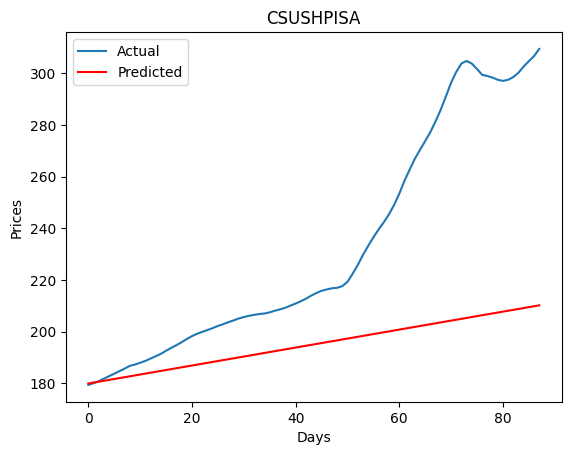

In [27]:
import matplotlib.pyplot as plt

plt.title("CSUSHPISA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(actual_price, label='Actual')
plt.plot(predicted_price,color='red', label='Predicted')
plt.legend()
plt.show()

# Evaluation Metrics

In [28]:
# Evaluation metrics for actual price and predicted price

# rmse - root mean squared error
print("rmse :", metrics.mean_squared_error(actual_price,predicted_price))
# mape - mean absolute percentage error
print("mape :", metrics.mean_absolute_percentage_error(actual_price,predicted_price))

rmse : 2620.7314872468255
mape : 0.14152884226552556


# CSUSHPISA Forcasted for 5 days

In [29]:
# Time Series Analysis - Forcasting
# CSUSHPISA Forecast for 5 days 

forecast=model_fit.predict(len(data1), len(data1)+4)
forecast

array([0.59727426, 0.59868984, 0.60010542, 0.601521  , 0.60293658])

In [30]:
from UserDefinedFns import conversionSingle

forecastTable=conversionSingle(forecast,["Predicted_CSUSHPISA"])
forecast_price=Ms.inverse_transform(forecastTable)
Predicted_forecast_price=conversionSingle(forecast_price,["Predicted_CSUSHPISA"])
Predicted_forecast_price

,Predicted_CSUSHPISA
0,210.559398
1,210.906836
2,211.254274
3,211.601713
4,211.949151


In [31]:
Predicted_forecast_price.to_csv("Predicted_CSUSHPISA.csv",index=False)